# Table of Contents: 


[Introduction](#Introduction)


[Reviews Preprocessing and Cleaning](#Reviews-Preprocessing-and-Cleaning)


[Story Generation and Visualization from reviews](#Story-Generation-and-Visualization-from-reviews)  


[Extracting Features from Cleaned reviews](#Extracting-Features-from-Cleaned-reviews)


[Model Building: Sentiment Analysis](#Model-Building:-Sentiment-Analysis)

[Conclusion](#Conclusion)


### Introduction 


In the vast expanse of the digital marketplace, consumers are bombarded with an array of product choices within any given category. The decision-making process can be daunting, as customers navigate through a sea of options. Amidst this abundance, product reviews emerge as beacons of guidance, offering insights from those who have tread the path before. These reviews, left by customers who have experienced the products firsthand, serve as valuable indicators of quality and satisfaction.
While numerical ratings provide a quick reference to gauge a product’s reception, they lack the depth and nuance of written reviews. It is within the lines of these textual testimonials that the true essence of customer feedback resides. However, deciphering the sentiment behind each sentence is a task that demands time and attention. In today’s fast-paced world, where efficiency is paramount, such a manual approach is impractical.
Enter the transformative power of Artificial Intelligence (AI) and Natural Language Processing (NLP) technology. Our project stands at the intersection of AI innovation and consumer experience, aiming to simplify the complex task of sentiment analysis. By employing cutting-edge NLP techniques, we aspire to distill the sentiments expressed in reviews into clear, actionable insights.


#### What is sentiment analysis?

Sentiment Analysis is the most common text classification tool that analyses an incoming message and tells whether the underlying sentiment is positive, negative our neutral.Understanding people’s emotions is essential for businesses since customers are able to express their thoughts and feelings more openly than ever before.It is quite hard for a human to go through each single line and identify the emotion being the user experience.Now with technology, we can automatically analyzing customer feedback, from survey responses to social media conversations, brands are able to listen attentively to their customers, and tailor products and services to meet their needs.

#### Problem statement

The Amazon Marketplace is a bustling ecosystem where millions of product reviews are generated each month. These reviews serve as a treasure trove of customer sentiment, offering valuable insights into consumer behavior and preferences. However, manually analyzing this vast volume of text data is time-consuming and error-prone for Amazon sellers.
Challenge
The challenge lies in efficiently extracting actionable insights from reviews to enhance seller responsiveness. Sellers need a tool that can automatically classify review sentiments (positive, negative, or neutral) and identify 
patterns within the text. Such insights can guide product improvements, marketing strategies, and customer interactions.

#### OBJECTIVES OF PROJECT

##### 1.Preprocessing and cleaning

##### 2.Story generation and Visualization from reviews

##### 3.Extracting Features from cleaned reviews

##### 4.Model Building: Sentiment Analysis

In [97]:
#Basic libraries
import pandas as pd 
import numpy as np 


#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
# from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

Importing the dataset
Let's welcome our dataset and see what's inside the box

In [42]:
!pip install imbalanced-learn


In [43]:
raw_reviews = pd.read_csv('amazon_reviews.csv')
## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(raw_reviews.shape))
print (raw_reviews.info())

The shape of the  data is (row, column):(4915, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB
None


The dataset contains 4,915 rows and 12 columns, representing valuable customer feedback.
Missing values in ‘reviewerName’ and ‘reviewText’ need attention for accurate sentiment analysis.
Leveraging sentiment scores and time-related features can enhance Amazon seller strategies.

In [44]:
raw_reviews.head()

Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0                   0   
4            0           0           0                   0   

   score_average_rating  wilson_lower_bound  
0                   0.0                 0.0  
1                   0.0                 0.0  
2                   0.0                 0.0  
3                   0.0                 0.0  
4                   0.0                 0.0

### Dataset Details
The file includes columns for an index , reviewerName, overall,reviewText, reviewTime, day_diff, helpful_yes, helpful_no, total_vote, score_pos_neg_diff, score_average_rating, wilson_lower_bound.

**Description of columns in the file:**
**Unnamed: 0:** This is likely an index column that uniquely identifies each row of the dataset.

**reviewerName:** The name of the reviewer who left the feedback.

**overall:** The rating given by the reviewer, typically on a scale (e.g., 1 to 5).

**reviewText:** The text of the review where the reviewer describes their experience with the product.

**reviewTime:** The date when the review was posted.

**day_diff:** The number of days that have passed since the review was posted, which can be useful for analyzing recent versus older reviews.

**helpful_yes:** The number of times a review was marked as ‘helpful’ by other users.

**helpful_no:** The number of times a review was marked as ‘not helpful’ by other users.

**total_vote:** The total number of votes (helpful and not helpful) that a review has received.

**score_pos_neg_diff:** A score that may represent the difference between the number of positive and negative sentiments within the review.

**score_average_rating:** An average rating score that could be derived from the overall ratings.

**wilson_lower_bound:** A statistical measure that gives a lower bound of the rating score confidence interval, which can be useful for determining the reliability of the ratings.

Each column provides a different dimension of data that can be analyzed to gain insights into customer sentiment and product performance.

### Reviews Preprocessing and Cleaning
We got to do lot of preprocessing before sending the reviews to the model. Let's go step by step.

#### Handling NaN values
Let's check for null values

In [45]:
process_reviews=raw_reviews.copy()

#Checking for null values
process_reviews.isnull().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

It is nearly complete, with **only two missing entries** in 'reviewerName' and 'reviewText', which are critical for personalization and sentiment analysis. The integrity of key metrics such as 'overall' rating and 'wilson_lower_bound' is intact, ensuring reliable inputs for our sentiment analysis tool. Addressing the sparse missing data will enable us to harness the full potential of customer feedback, enhancing our market strategies and product development.

In [46]:
# filling Missing for the review text where the value is null
process_reviews['reviewText']=process_reviews['reviewText'].fillna('Missing')

Any missing text in the product reviews where customers didn’t provide specific comments—will now be labeled as “Missing.” By doing this, we make sure that every review has some content, which helps us analyze customer sentiment more effectively. It’s like tidying up our data so that we can better understand what customers are saying about our products

In [47]:
process_reviews.isnull().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

### Creating 'sentiment' column
This is an important preprocessing phase, we are deciding the outcome column (sentiment of review) based on the overall score. If the score is greater than 3, we take that as positive and if the value is less than 3 it is negative If it is equal to 3, we take that as neutral sentiment

In [48]:
# Review distribution
process_reviews['overall'].value_counts()

overall
5.0    3922
4.0     527
1.0     244
3.0     142
2.0      80
Name: count, dtype: int64

In [49]:
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [50]:
# Creating sentiment column
# 4, 5 -> Positive
# 3 -> Neutral
# 1, 2 -> Negative
# Applying the function and saving the result in new column sentiment
process_reviews['sentiment'] = process_reviews.apply(f, axis=1)
process_reviews.head()

Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0                   0   
4            0           0           0                   0   

   score_average_rating  wilson_lower_bound sentiment  
0                   0.0                 0.0  Positive  
1                   0.0                 0.0  Positive  
2                   0.0                 0.0  Positive  
3                   0.0                 0.0  Positive  
4                   0.0                 0.0  Positive

In [51]:
# Reviewing the value counts of Positive, Negative, Neutral reviews
process_reviews['sentiment'].value_counts()

# We can see that the dataset is heavily imbalanced

sentiment
Positive    4449
Negative     324
Neutral      142
Name: count, dtype: int64

In [52]:
# Checking the upvote distribution
filtered_upvote_counts = process_reviews[process_reviews['total_vote'] > 0]['total_vote'].value_counts()
print(filtered_upvote_counts)

total_vote
1       380
2        96
3        25
5        13
4        11
7         7
8         3
6         3
109       1
13        1
65        1
16        1
1694      1
139       1
25        1
10        1
1505      1
236       1
118       1
2020      1
68        1
495       1
48        1
21        1
49        1
Name: count, dtype: int64


In [53]:
# Checking the helpful_yes distribution
filtered_helpful_yes_counts = process_reviews[process_reviews['helpful_yes'] > 0]['helpful_yes'].value_counts()
print(filtered_helpful_yes_counts)

helpful_yes
1       323
2        32
3        16
4        10
5         7
6         7
7         2
8         2
22        1
82        1
51        1
14        1
1568      1
112       1
1952      1
1428      1
53        1
60        1
422       1
38        1
15        1
45        1
Name: count, dtype: int64


In [54]:
# Checking the helpful_no distribution
filtered_helpful_yes_counts = process_reviews[process_reviews['helpful_no'] > 0]['helpful_no'].value_counts()
print(filtered_helpful_yes_counts)

helpful_no
1      175
2       43
3        7
6        2
4        2
27       2
10       1
73       1
8        1
68       1
110      1
183      1
77       1
126      1
14       1
9        1
Name: count, dtype: int64


**Review text-Punctuation Cleaning**

Let's begin our text processing by removing the punctuations

In [55]:
# Removing unnecessary columns
process_reviews = process_reviews.drop(['reviewerName'], axis=1)
#Creating a copy 
clean_reviews = process_reviews.copy()

In [56]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [57]:
process_reviews['reviewText']=process_reviews['reviewText'].apply(lambda x:review_cleaning(x))
process_reviews.head()

Unnamed: 0  overall                                         reviewText  \
0           0      4.0                                          no issues   
1           1      5.0  purchased this for my device it worked as adve...   
2           2      4.0  it works as expected i should have sprung for ...   
3           3      5.0  this think has worked out greathad a diff bran...   
4           4      5.0  bought it with retail packaging arrived legit ...   

   reviewTime  day_diff  helpful_yes  helpful_no  total_vote  \
0  2014-07-23       138            0           0           0   
1  2013-10-25       409            0           0           0   
2  2012-12-23       715            0           0           0   
3  2013-11-21       382            0           0           0   
4  2013-07-13       513            0           0           0   

   score_pos_neg_diff  score_average_rating  wilson_lower_bound sentiment  
0                   0                   0.0                 0.0  Positive  
1                   0                   0.0                 0.0  Positive  
2                   0                   0.0                 0.0  Positive  
3                   0                   0.0                 0.0  Positive  
4                   0                   0.0                 0.0  Positive

We have removed all punctuation in our review column

### Data Analysis

### Story Generation and Visualization from reviews
In this section we will complete do exploratory data analysis on texts as well as other factors to understand what are all features which contributes to the sentiment.

**Prior analysis assumptions:**

Higher the helpful rate the sentiment becomes positive
There will be many negative sentiment reviews in the 2012 and 2014 year
There will be more reviews at the starting of a month
These assumptions will be verified with our plots also we will do text analysis alot.



In [58]:
# Essentially, this computes the average value of the 'helpful_yes' column for each unique value in the 'sentiment' column 
# and presents it in a DataFrame where each row corresponds to a sentiment category and the 
# column contains the mean 'helpful_yes' value for that sentiment category.
pd.DataFrame(process_reviews.groupby('sentiment')['helpful_yes'].mean())

helpful_yes
sentiment             
Negative      6.811728
Neutral       0.352113
Positive      0.941110

In [59]:
pd.DataFrame(process_reviews.groupby('sentiment')['helpful_no'].mean())

helpful_no
sentiment            
Negative     1.151235
Neutral      0.190141
Positive     0.142504

In [60]:
# We can neglect this as score_pos_neg_diff is the difference between helpful_yes and helpful_no
pd.DataFrame(process_reviews.groupby('sentiment')['score_pos_neg_diff'].mean())

score_pos_neg_diff
sentiment                    
Negative             5.660494
Neutral              0.161972
Positive             0.798606

#####  Overall we can see that the mean of of helpful rate is higher for negative reviews than neutral and positive reviews.

In [61]:
process_reviews['reviewTime'].value_counts()

reviewTime
2013-12-30    26
2014-07-01    23
2014-08-01    22
2014-02-01    21
2013-09-12    20
              ..
2013-08-05     1
2012-08-24     1
2012-02-09     1
2012-09-23     1
2014-07-23     1
Name: count, Length: 690, dtype: int64

In [62]:
# convert the date column into a datetime object
process_reviews['date'] = pd.to_datetime(process_reviews['reviewTime'])

# extract the day, month, and year components
process_reviews['day'] = process_reviews['date'].dt.day
process_reviews['month'] = process_reviews['date'].dt.month
process_reviews['year'] = process_reviews['date'].dt.year

# show the modified data frame
process_reviews.head()

Unnamed: 0  overall                                         reviewText  \
0           0      4.0                                          no issues   
1           1      5.0  purchased this for my device it worked as adve...   
2           2      4.0  it works as expected i should have sprung for ...   
3           3      5.0  this think has worked out greathad a diff bran...   
4           4      5.0  bought it with retail packaging arrived legit ...   

   reviewTime  day_diff  helpful_yes  helpful_no  total_vote  \
0  2014-07-23       138            0           0           0   
1  2013-10-25       409            0           0           0   
2  2012-12-23       715            0           0           0   
3  2013-11-21       382            0           0           0   
4  2013-07-13       513            0           0           0   

   score_pos_neg_diff  score_average_rating  wilson_lower_bound sentiment  \
0                   0                   0.0                 0.0  Positive   
1                   0                   0.0                 0.0  Positive   
2                   0                   0.0                 0.0  Positive   
3                   0                   0.0                 0.0  Positive   
4                   0                   0.0                 0.0  Positive   

        date  day  month  year  
0 2014-07-23   23      7  2014  
1 2013-10-25   25     10  2013  
2 2012-12-23   23     12  2012  
3 2013-11-21   21     11  2013  
4 2013-07-13   13      7  2013

In [63]:
process_reviews.groupby(['year','sentiment'])['sentiment'].count()

year  sentiment
2012  Negative       62
      Neutral        15
      Positive      424
2013  Negative      195
      Neutral        82
      Positive     2401
2014  Negative       67
      Neutral        45
      Positive     1624
Name: sentiment, dtype: int64

In [64]:
# Fetch unique values from 'year' and 'sentiment' columns
unique_years = process_reviews['year'].unique()
unique_sentiments = process_reviews['sentiment'].unique()

print("Unique years:", unique_years)
print("Unique sentiments:", unique_sentiments)

Unique years: [2014 2013 2012]
Unique sentiments: ['Positive' 'Neutral' 'Negative']


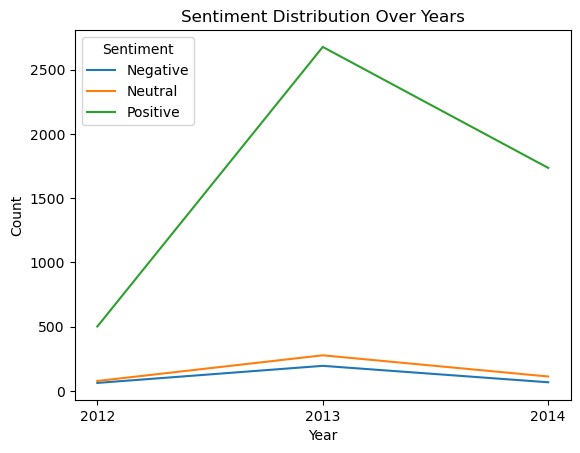

In [65]:
sentiment_counts = process_reviews.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

# Plotting
sentiment_counts.plot(kind='line', stacked=True)
plt.title('Sentiment Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks([2012, 2013, 2014])
plt.legend(title='Sentiment')
plt.show()

**Insights**

There was a significant increase in positive sentiment in 2013, indicating a possible favorable event or successful marketing campaign that year.
Despite the decline in 2014, positive sentiment remained higher than negative and neutral sentiments, suggesting overall good reception of products or services.
The consistency in negative and neutral sentiments over the years could imply a stable but small group of customers with unchanging opinions.

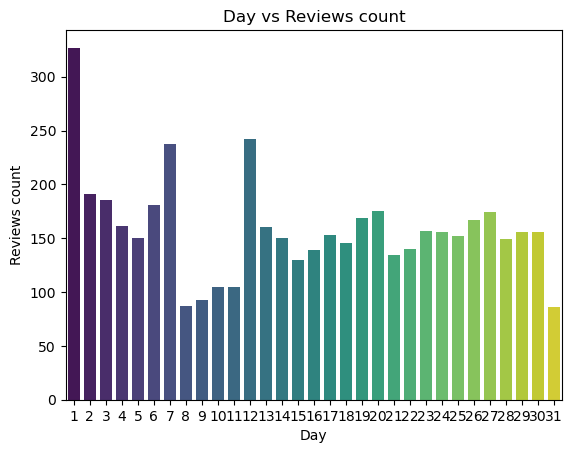

In [66]:
#Creating a dataframe
day=pd.DataFrame(process_reviews.groupby('day')['reviewText'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.barplot(x="day", y="reviewText", data=day, palette="viridis")
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

##### Insights

The graph shows a significant peak in reviews on day 8, suggesting a particular event or promotion may have driven a higher volume of customer feedback.
There is a noticeable increase in the number of reviews towards the end of the month, which could indicate a trend or a seasonal effect.
Understanding these patterns can help businesses identify key days for customer engagement and optimize their marketing strategies accordingly

#### Creating New Features

Polarity: We use Textblob for for figuring out the rate of sentiment . It is between [-1,1] where -1 is negative and 1 is positive polarity

Review length: length of the review which includes each letters and spaces

Word length: This measures how many words are there in review

In [67]:
# The polarity score ranges from -1 to 1. A score of -1 means the words are super negative, like “disgusting” or “awful.” 
# A score of 1 means the words are super positive, like “excellent” or “best.” 
process_reviews['polarity'] = process_reviews['reviewText'].map(lambda text: TextBlob(text).sentiment.polarity)
process_reviews['review_len'] = process_reviews['reviewText'].astype(str).apply(len)
process_reviews['word_count'] = process_reviews['reviewText'].apply(lambda x: len(str(x).split()))

In [68]:
process_reviews.head()

Unnamed: 0  overall                                         reviewText  \
0           0      4.0                                          no issues   
1           1      5.0  purchased this for my device it worked as adve...   
2           2      4.0  it works as expected i should have sprung for ...   
3           3      5.0  this think has worked out greathad a diff bran...   
4           4      5.0  bought it with retail packaging arrived legit ...   

   reviewTime  day_diff  helpful_yes  helpful_no  total_vote  \
0  2014-07-23       138            0           0           0   
1  2013-10-25       409            0           0           0   
2  2012-12-23       715            0           0           0   
3  2013-11-21       382            0           0           0   
4  2013-07-13       513            0           0           0   

   score_pos_neg_diff  score_average_rating  wilson_lower_bound sentiment  \
0                   0                   0.0                 0.0  Positive   
1                   0                   0.0                 0.0  Positive   
2                   0                   0.0                 0.0  Positive   
3                   0                   0.0                 0.0  Positive   
4                   0                   0.0                 0.0  Positive   

        date  day  month  year  polarity  review_len  word_count  
0 2014-07-23   23      7  2014  0.000000           9           2  
1 2013-10-25   25     10  2013  0.200000         154          31  
2 2012-12-23   23     12  2012  0.129167         163          31  
3 2013-11-21   21     11  2013  0.025000         293          58  
4 2013-07-13   13      7  2013  0.386667         278          50

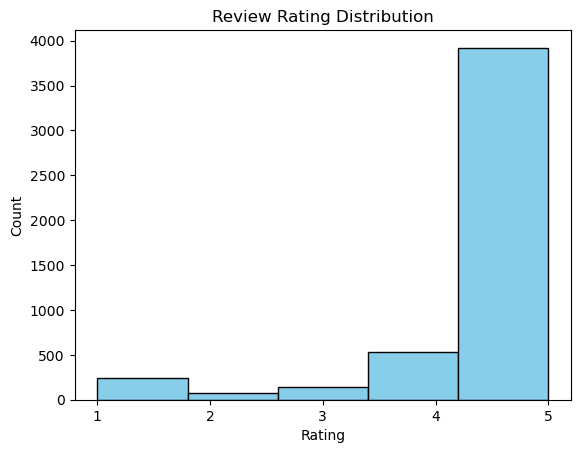

In [108]:
# Assuming process_reviews['overall'] contains your data
plt.hist(process_reviews['overall'], bins=5, color='skyblue', edgecolor='black')

plt.xlabel('Rating')
plt.ylabel('Count')

plt.xticks([1, 2, 3, 4, 5])
plt.title('Review Rating Distribution')

# Display the plot
plt.show()

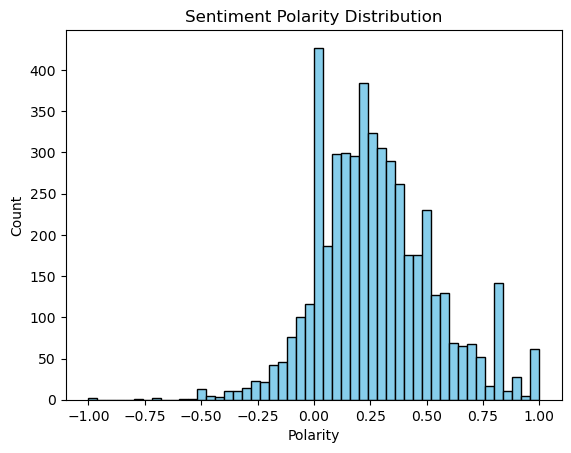

In [70]:
# Assuming process_reviews['polarity'] contains your data
plt.hist(process_reviews['polarity'], bins=50, color='skyblue', edgecolor='black')

plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Sentiment Polarity Distribution')

plt.show()

We have a lot of positive polarities compared to the negative polarities

This polarity distributions assures the number of positive reviews we had

We can say that this polarity is a normally distributed but not standard normal

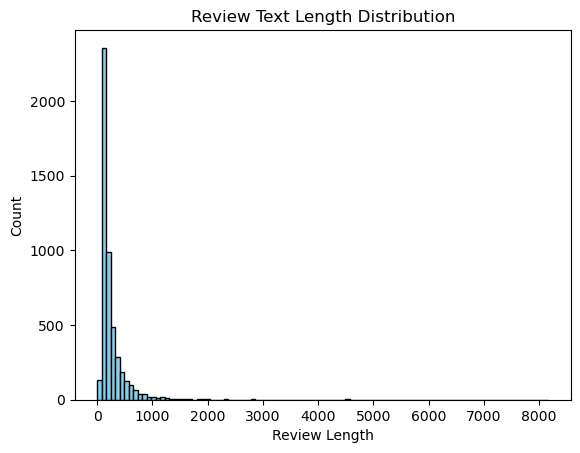

In [71]:
# Assuming process_reviews['review_len'] contains your data
plt.hist(process_reviews['review_len'], bins=100, color='skyblue', edgecolor='black')

plt.xlabel('Review Length')
plt.ylabel('Count')
plt.title('Review Text Length Distribution')

plt.show()

We have a right skewed distribution where most of the lengths falls between 0-1000

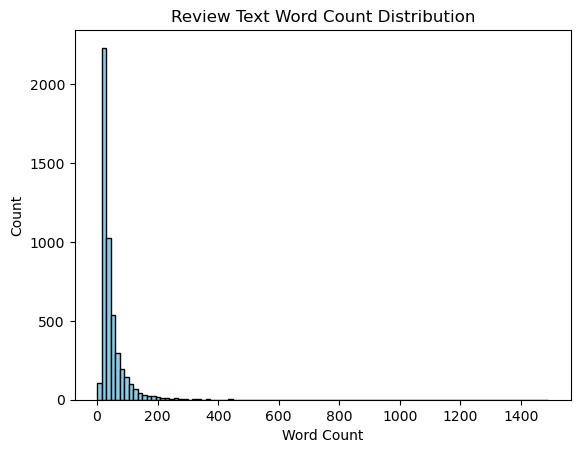

In [72]:
# Assuming process_reviews['word_count'] contains your data
plt.hist(process_reviews['word_count'], bins=100, color='skyblue', edgecolor='black')

plt.xlabel('Word Count')
plt.ylabel('Count')
plt.title('Review Text Word Count Distribution')

plt.show()

We have a right skewed distribution with most of the words falling between 0-200 in a a review

#### N-gram analysis

Welcome to the deep text analysis. Here we will be using ngrams to analyse the text, based on it's sentiment

##### Monogram analysis

Here we will plot most frequent one word in reviews based on sentiments

In [73]:
#Filtering data
review_pos = process_reviews[process_reviews["sentiment"]=='Positive'].dropna()
review_neu = process_reviews[process_reviews["sentiment"]=='Neutral'].dropna()
review_neg = process_reviews[process_reviews["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [74]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["reviewText"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
print("Positive review n-grams:")
print(fd_sorted.head(25))  # Check if this dataframe is empty or not
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviewText"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
print("Neutral review n-grams:")
print(fd_sorted.head(25))  # Check if this dataframe is empty or not
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviewText"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
print("Negative review n-grams:")
print(fd_sorted.head(25))  # Check if this dataframe is empty or not
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')


Positive review n-grams:
       word  wordcount
0      card       3543
1     works       1486
2     great       1387
3     phone       1370
4    memory       1223
5        sd       1045
6       use        992
7   sandisk        954
8       one        890
9    galaxy        885
10     fast        860
11     good        813
12    price        808
13    cards        744
14   bought        717
15  storage        714
16  samsung        708
17     well        612
18   tablet        604
19    speed        543
20    music        543
21     will        541
22    using        513
23    micro        472
24    class        472
Neutral review n-grams:
       word  wordcount
0      card        226
1     phone         75
2   sandisk         67
3       one         48
4     cards         43
5       use         38
6      will         36
7    galaxy         35
8        sd         35
9     works         35
10   memory         33
11     work         30
12    speed         29
13       gb         28
14   bou

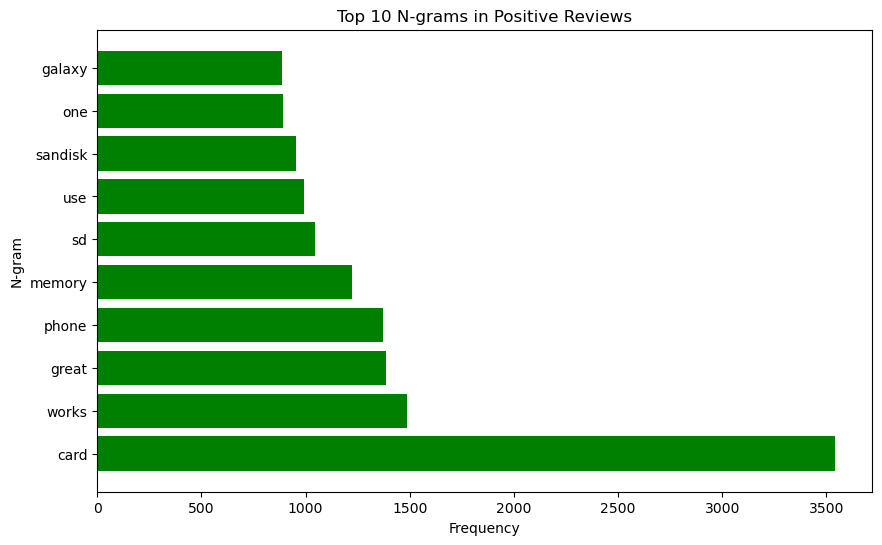

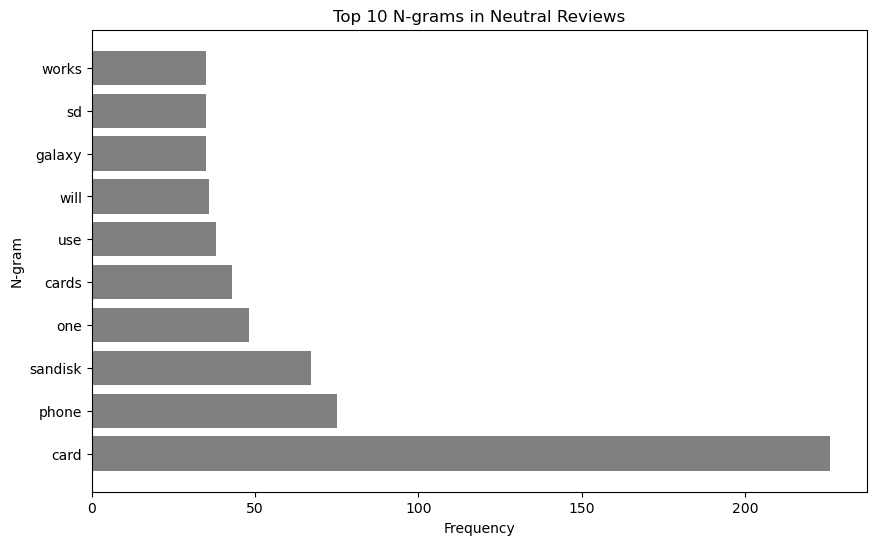

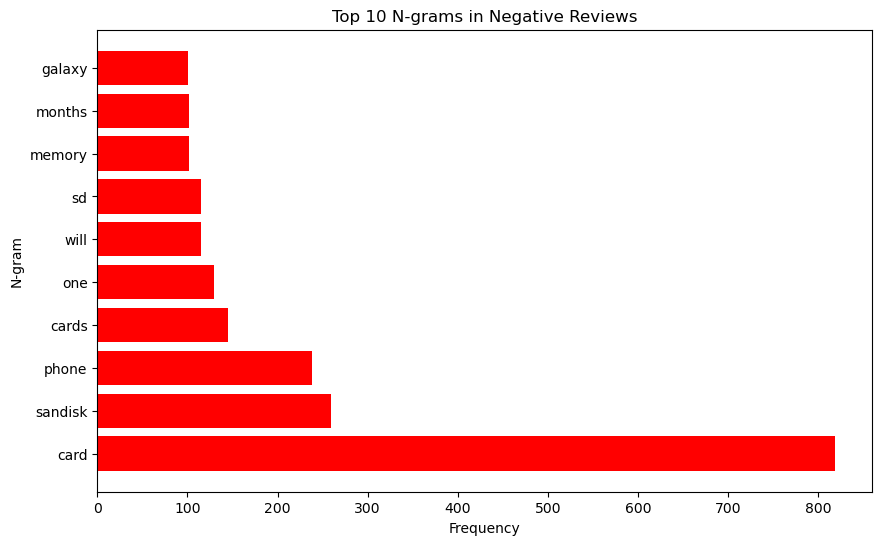

In [75]:
import matplotlib.pyplot as plt

# Plotting
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["reviewText"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
plt.figure(figsize=(10, 6))
plt.barh(fd_sorted["word"].head(10)[::-1], fd_sorted["wordcount"].head(10)[::-1], color='green')
plt.xlabel('Frequency')
plt.ylabel('N-gram')
plt.title('Top 10 N-grams in Positive Reviews')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.show()

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviewText"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
plt.figure(figsize=(10, 6))
plt.barh(fd_sorted["word"].head(10)[::-1], fd_sorted["wordcount"].head(10)[::-1], color='grey')
plt.xlabel('Frequency')
plt.ylabel('N-gram')
plt.title('Top 10 N-grams in Neutral Reviews')
plt.gca().invert_yaxis()
plt.show()

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviewText"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
plt.figure(figsize=(10, 6))
plt.barh(fd_sorted["word"].head(10)[::-1], fd_sorted["wordcount"].head(10)[::-1], color='red')
plt.xlabel('Frequency')
plt.ylabel('N-gram')
plt.title('Top 10 N-grams in Negative Reviews')
plt.gca().invert_yaxis()
plt.show()


As we see, the words doen't match with the sentiment except few. Through monogram we can't judge a sendiment based on one word. So let's try with frequent two words

#### Bigram analysis
Here we will plot most frequent two words in reviews based on sentiments

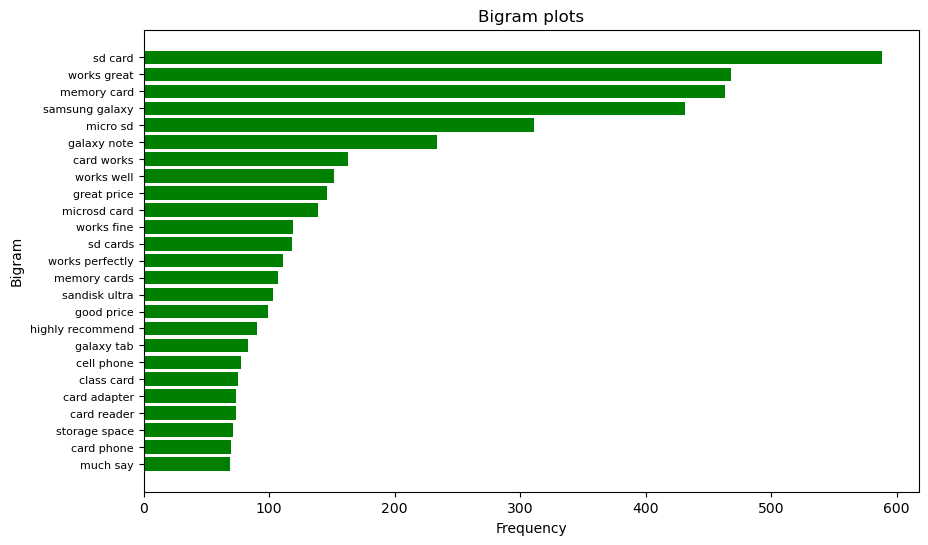

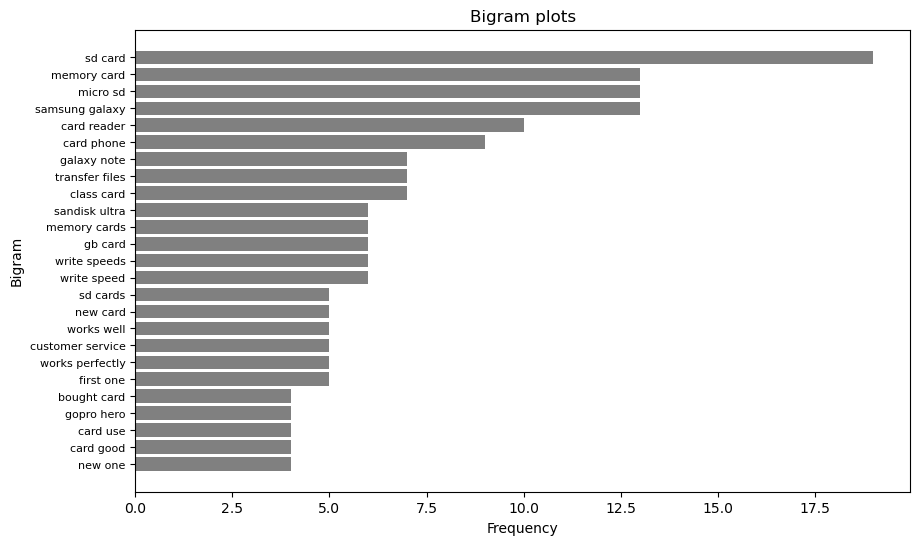

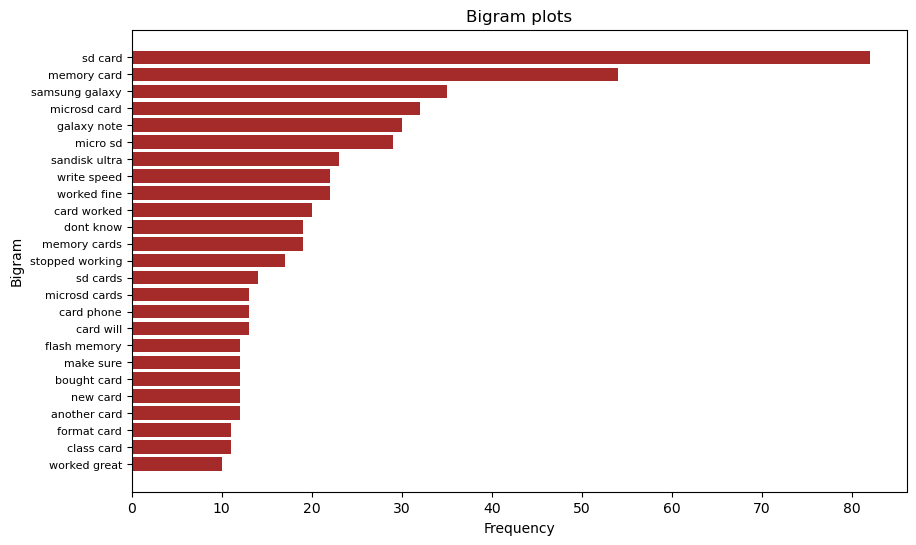

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create horizontal bar chart
def horizontal_bar_chart(dataframe, color):
    plt.figure(figsize=(10,6))
    plt.barh(dataframe['word'], dataframe['wordcount'], color=color)
    plt.xlabel('Frequency')
    plt.ylabel('Bigram')
    plt.yticks(fontsize=8)
    plt.title('Bigram plots')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
    plt.show()

# Plot for positive reviews
freq_dict_pos = defaultdict(int)
for sent in review_pos["reviewText"]:
    for word in generate_ngrams(sent, 2):
        freq_dict_pos[word] += 1
fd_sorted_pos = pd.DataFrame(sorted(freq_dict_pos.items(), key=lambda x: x[1])[::-1])
fd_sorted_pos.columns = ["word", "wordcount"]
horizontal_bar_chart(fd_sorted_pos.head(25), 'green')

# Plot for neutral reviews
freq_dict_neu = defaultdict(int)
for sent in review_neu["reviewText"]:
    for word in generate_ngrams(sent, 2):
        freq_dict_neu[word] += 1
fd_sorted_neu = pd.DataFrame(sorted(freq_dict_neu.items(), key=lambda x: x[1])[::-1])
fd_sorted_neu.columns = ["word", "wordcount"]
horizontal_bar_chart(fd_sorted_neu.head(25), 'grey')

# Plot for negative reviews
freq_dict_neg = defaultdict(int)
for sent in review_neg["reviewText"]:
    for word in generate_ngrams(sent, 2):
        freq_dict_neg[word] += 1
fd_sorted_neg = pd.DataFrame(sorted(freq_dict_neg.items(), key=lambda x: x[1])[::-1])
fd_sorted_neg.columns = ["word", "wordcount"]
horizontal_bar_chart(fd_sorted_neg.head(25), 'brown')

Here we can get a clear idea about the sentiments from the bi-words

#### Trigram Analysis
Here we will plot most frequent three words in reviews based on sentiments

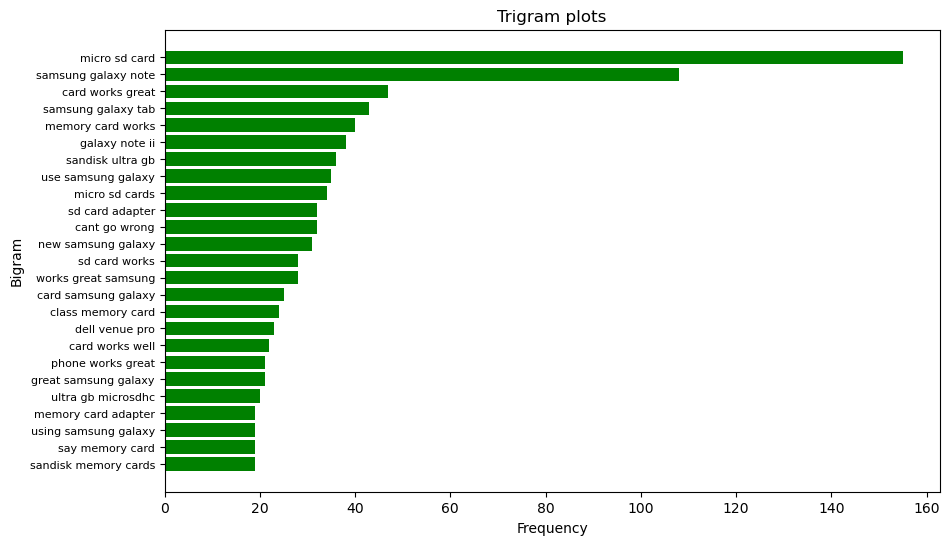

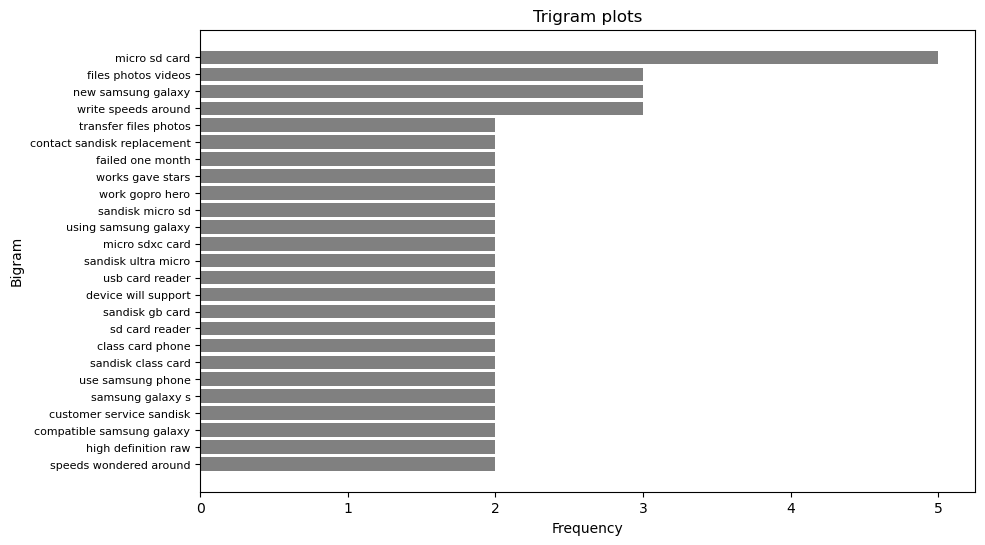

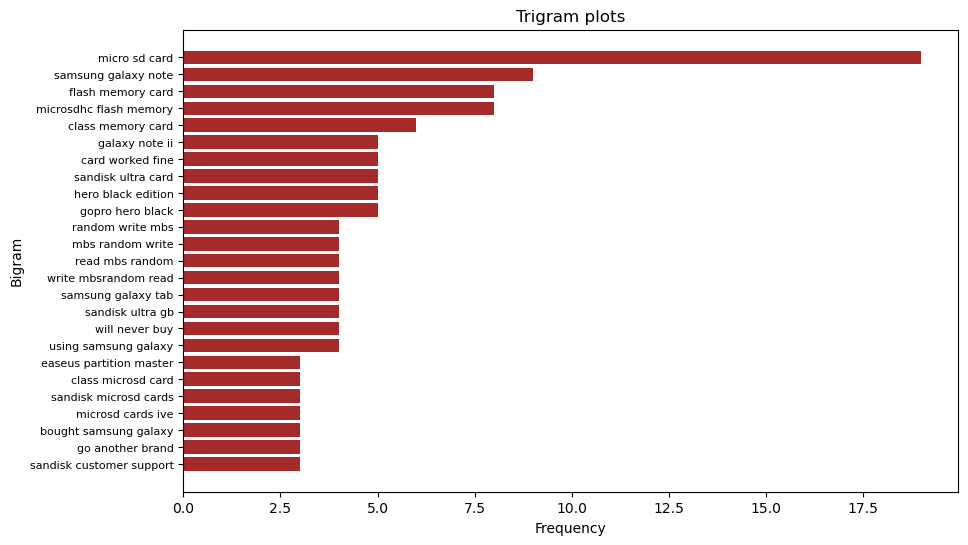

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create horizontal bar chart
def horizontal_bar_chart(dataframe, color):
    plt.figure(figsize=(10,6))
    plt.barh(dataframe['word'], dataframe['wordcount'], color=color)
    plt.xlabel('Frequency')
    plt.ylabel('Bigram')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=8)
    plt.title('Trigram plots')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
    plt.show()

# Plot for positive reviews
freq_dict_pos = defaultdict(int)
for sent in review_pos["reviewText"]:
    for word in generate_ngrams(sent, 3):
        freq_dict_pos[word] += 1
fd_sorted_pos = pd.DataFrame(sorted(freq_dict_pos.items(), key=lambda x: x[1])[::-1])
fd_sorted_pos.columns = ["word", "wordcount"]
horizontal_bar_chart(fd_sorted_pos.head(25), 'green')

# Plot for neutral reviews
freq_dict_neu = defaultdict(int)
for sent in review_neu["reviewText"]:
    for word in generate_ngrams(sent, 3):
        freq_dict_neu[word] += 1
fd_sorted_neu = pd.DataFrame(sorted(freq_dict_neu.items(), key=lambda x: x[1])[::-1])
fd_sorted_neu.columns = ["word", "wordcount"]
horizontal_bar_chart(fd_sorted_neu.head(25), 'grey')

# Plot for negative reviews
freq_dict_neg = defaultdict(int)
for sent in review_neg["reviewText"]:
    for word in generate_ngrams(sent, 3):
        freq_dict_neg[word] += 1
fd_sorted_neg = pd.DataFrame(sorted(freq_dict_neg.items(), key=lambda x: x[1])[::-1])
fd_sorted_neg.columns = ["word", "wordcount"]
horizontal_bar_chart(fd_sorted_neg.head(25), 'brown')

#### Word Cloud Analysis

#### Wordcloud-Positive reviews
Let's look at the word cloud of positive reviews

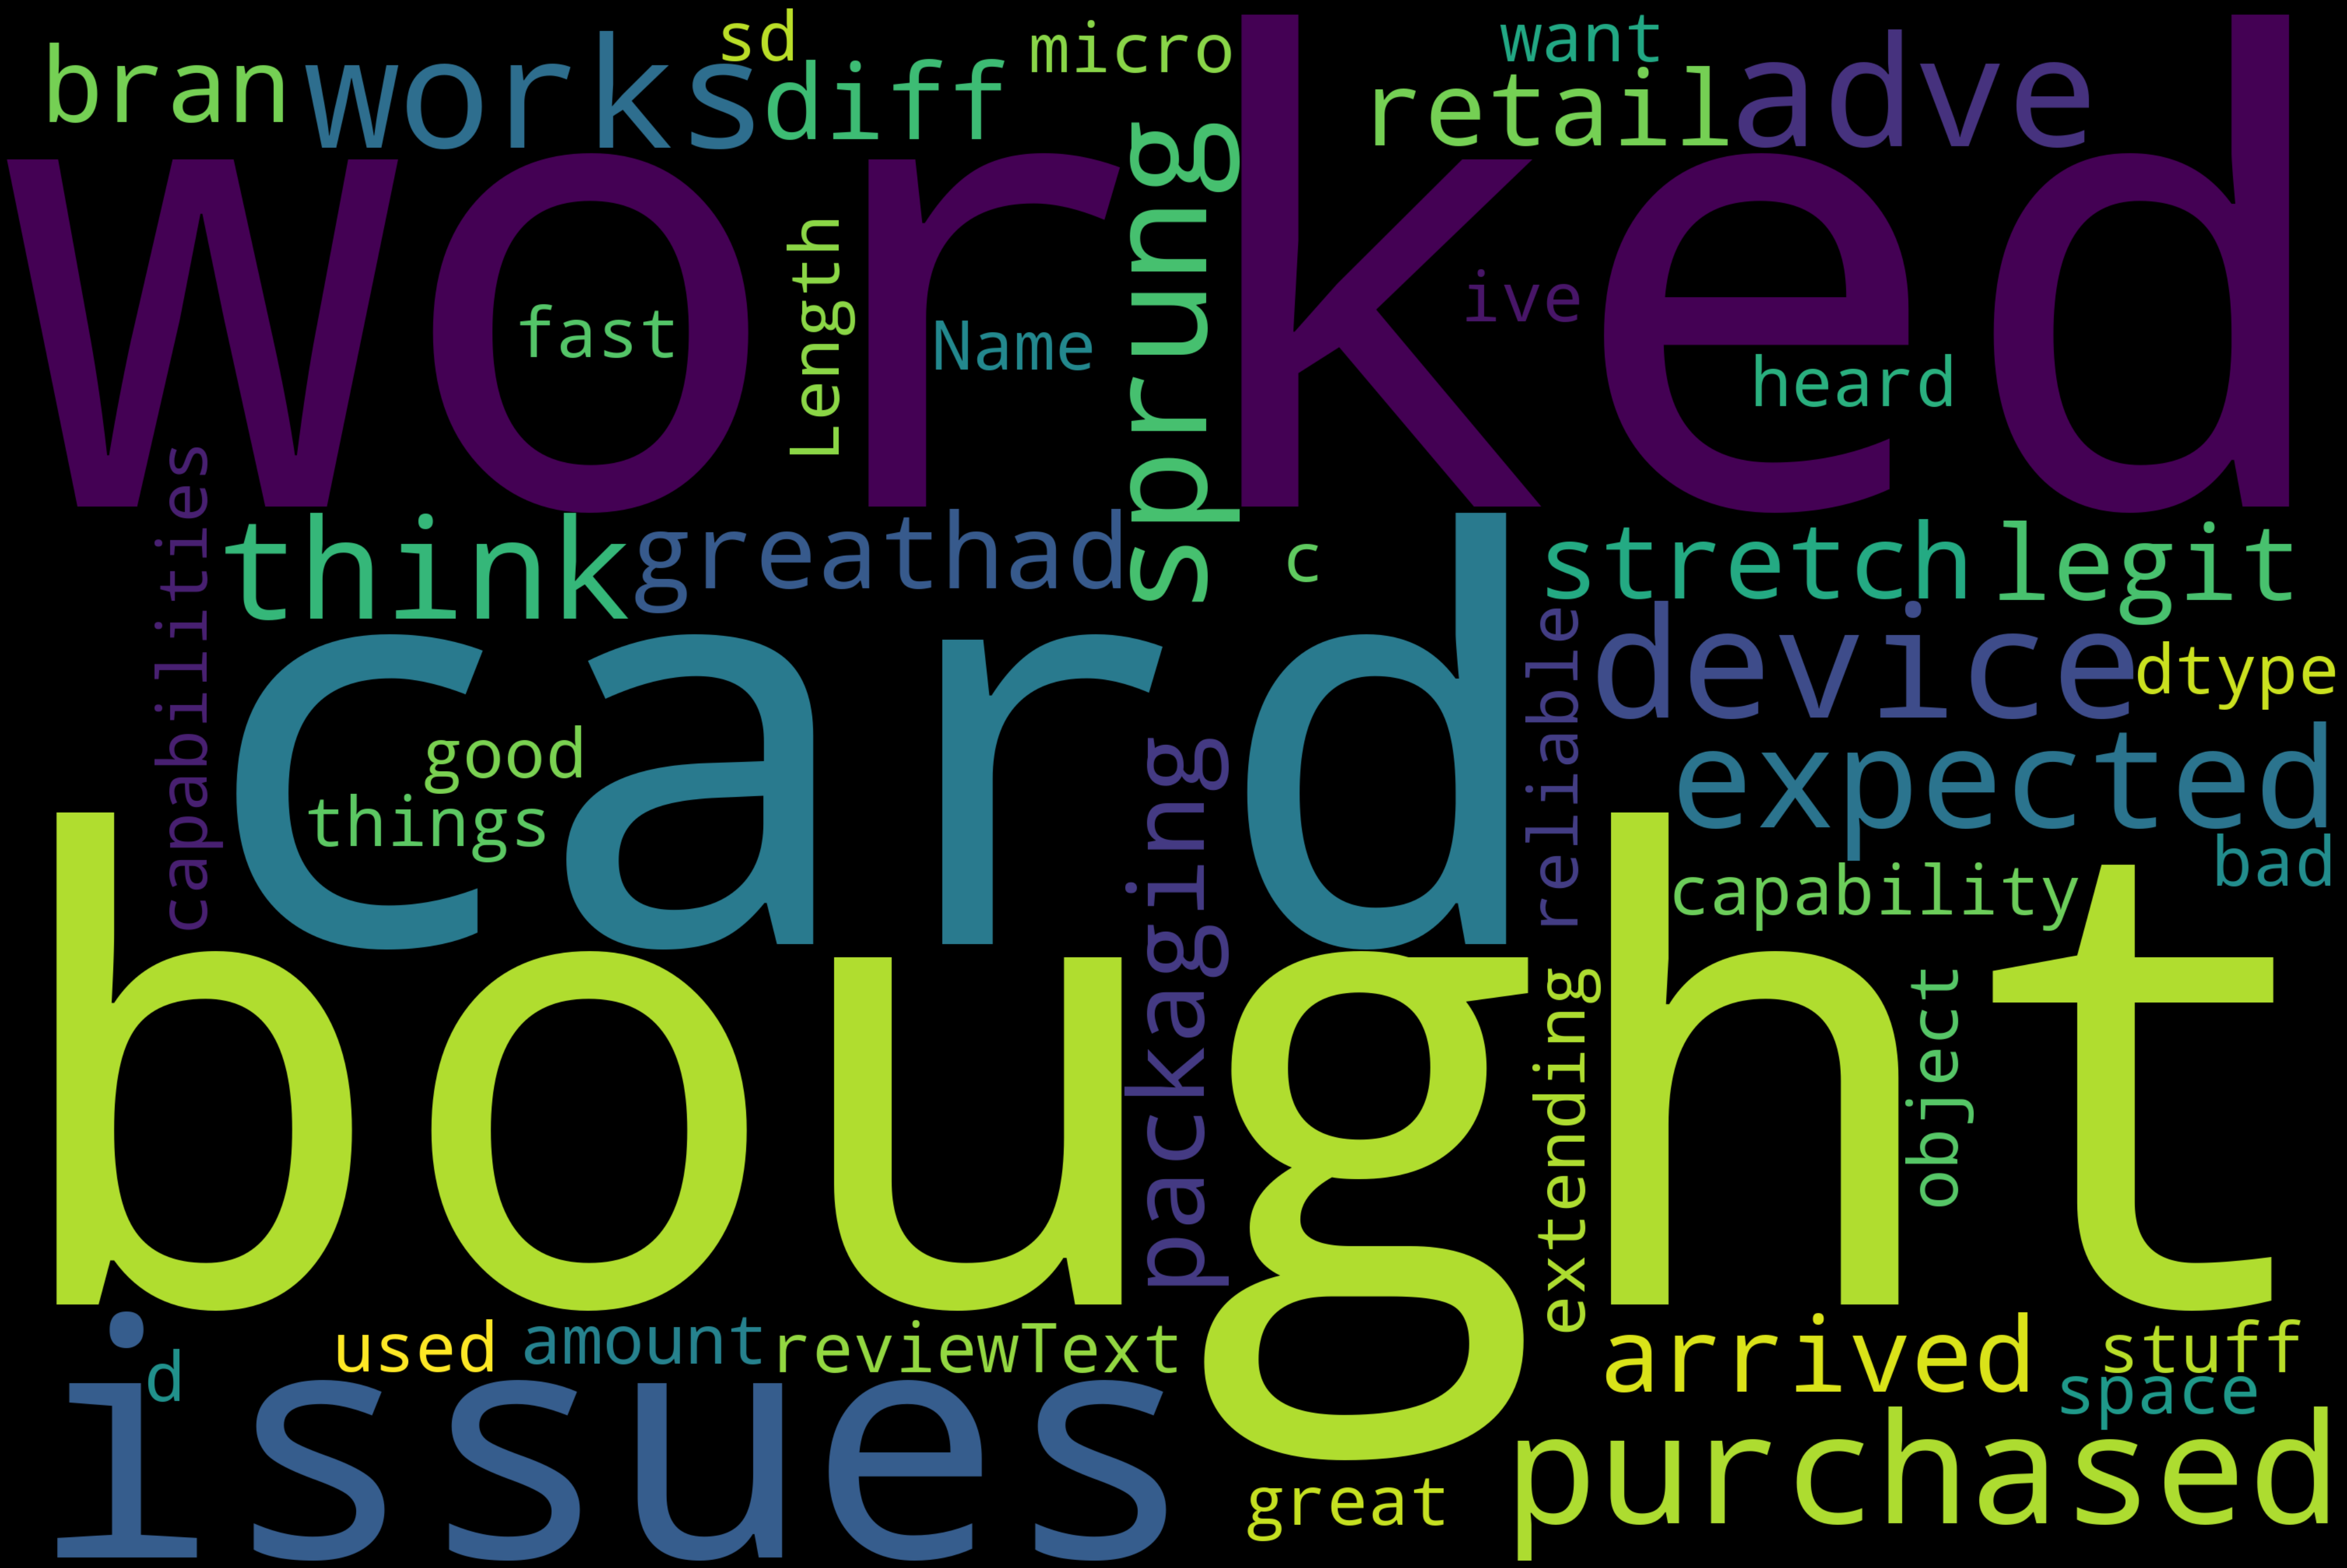

In [78]:
text = review_pos["reviewText"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see positive words like great,works,expected,exactly etc.,

#### Wordcloud-Neutral reviews
Let's look at the word cloud of neutral reviews

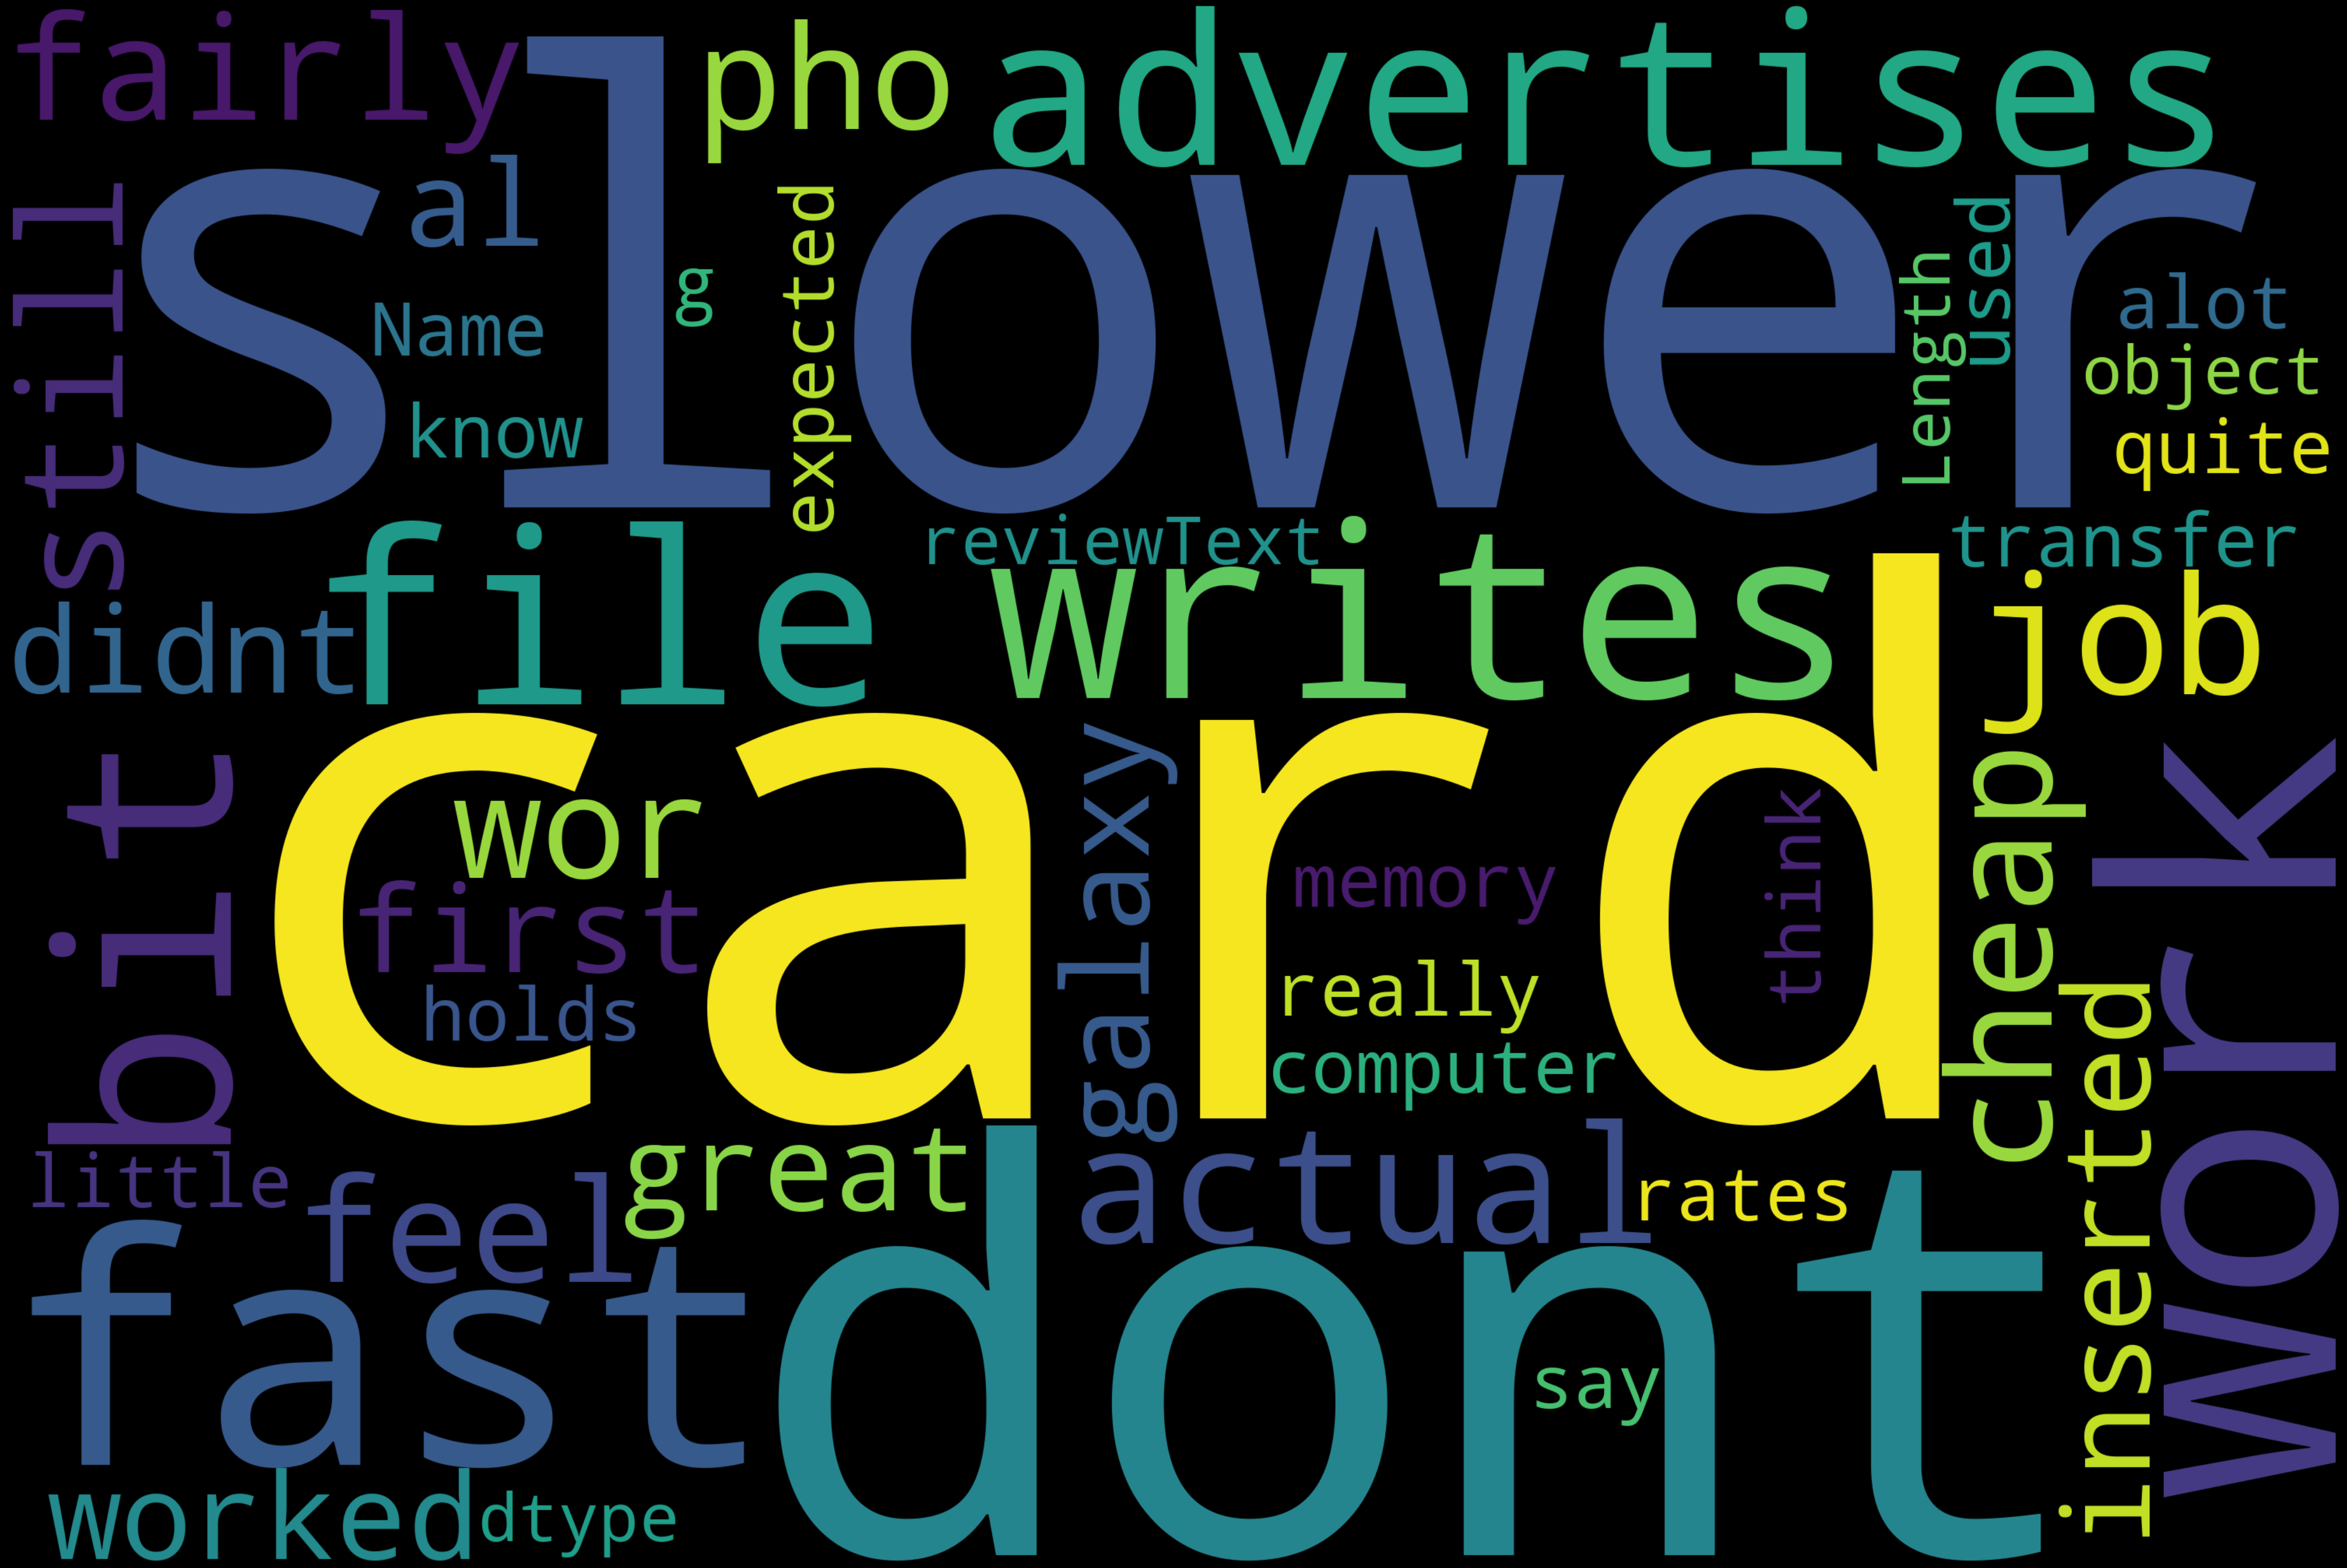

In [79]:
text = review_neu["reviewText"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Most of the neutral review words are focussed on the products and how can they be improved.

#### Wordcloud-Negative reviews
Let's look at the word cloud of negative reviews

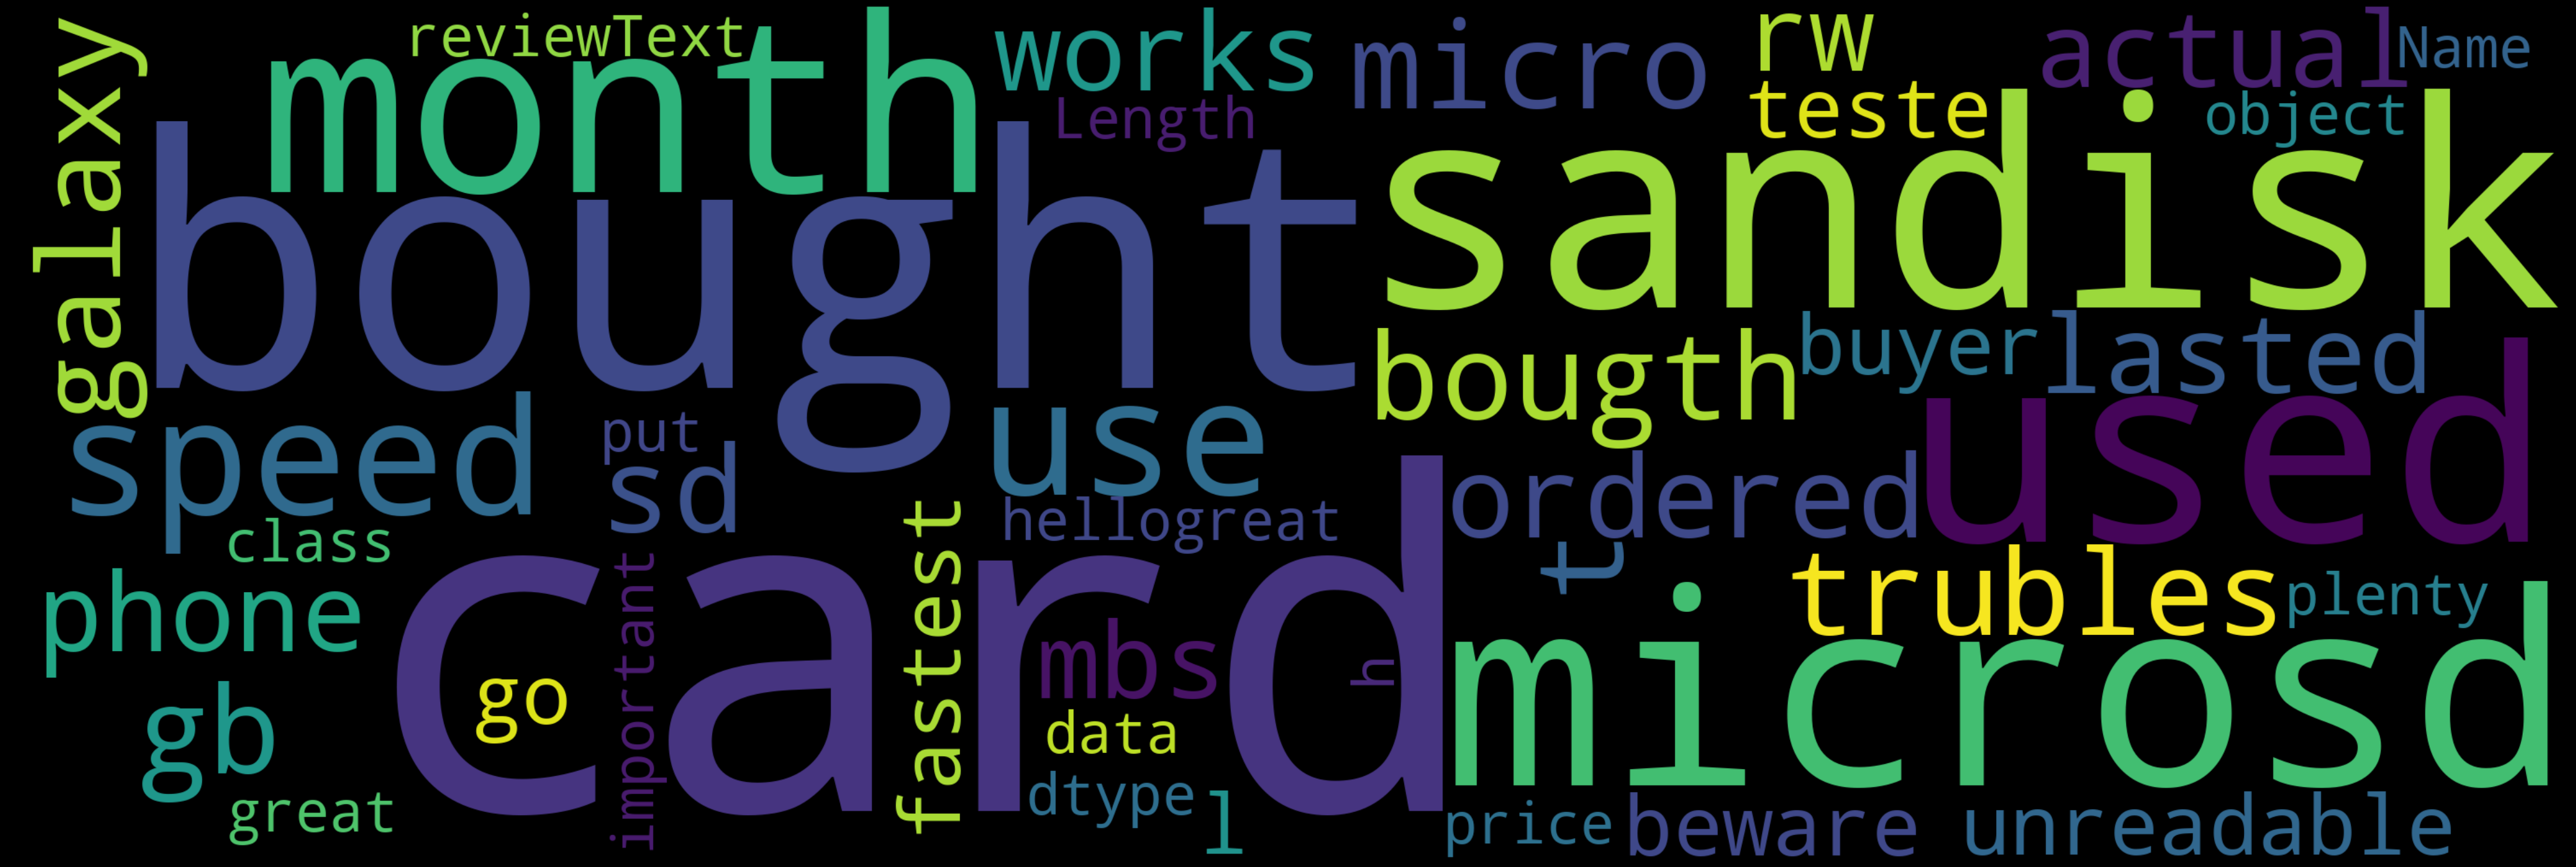

In [107]:
text = review_neg["reviewText"]
wordcloud = WordCloud(
    width = 3000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see negative review words such as beware,unreadable,trubles etc.,

### Extracting Features from Cleaned reviews

Before we build the model for our sentiment analysis, it is required to convert the review texts into vector formation as computer cannot understand words and their sentiment. In this project, we are going to use TF-TDF method to convert the texts

#### Encoding target variable-sentiment
Let's encode our target variable with Label encoder.

In [81]:
# calling the label encoder function
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
process_reviews['sentiment']= label_encoder.fit_transform(process_reviews['sentiment']) 
  
process_reviews['sentiment'].unique() 

array([2, 1, 0])

In [82]:
process_reviews['sentiment'].value_counts()

sentiment
2    4449
0     324
1     142
Name: count, dtype: int64

#### Stemming
Stemming the reviews¶

Stemming is a method of deriving root word from the inflected word. Here we extract the reviews and convert the words in reviews to its root word. for example,

    Going->go
    Finally->fina

If you notice, the root words doesn't need to carry a semantic meaning. There is another technique knows as Lemmatization where it converts the words into root words which has a semantic meaning. Simce it takes time. I'm using stemming

In [83]:
# Extracting 'reviews' for processing
review_features=process_reviews.copy()
review_features=review_features[['reviewText']].reset_index(drop=True)
review_features.head()

reviewText
0                                          no issues
1  purchased this for my device it worked as adve...
2  it works as expected i should have sprung for ...
3  this think has worked out greathad a diff bran...
4  bought it with retail packaging arrived legit ...

In [84]:
# Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['reviewText'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)    

In [85]:
corpus[3]

'think work greathad diff bran card went south monthsthi one held pretti well now updat month zero issu transfer card reliabl solidch'

The text in a review is in human language, which computers can’t directly interpret. To analyze the sentiment, we transform the text into a numerical format that computers can understand, using a method called TF-IDF.

### TFIDF(Term Frequency — Inverse Document Frequency)

TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

In [86]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['reviewText'])

In [87]:
X.shape

(4915, 5000)

In [88]:
#Getting the target variable(encoded)
y=process_reviews['sentiment']

### Handling Imbalance target feature-SMOTE

In our target feature, we noticed that we got a lot of positive sentiments compared to negative and neutral. So it is crucial to balanced the classes in such situatio. Here I use SMOTE(Synthetic Minority Oversampling Technique) to balance out the imbalanced dataset problem.It aims to balance class distribution by randomly increasing minority class examples by replicating them.

SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.


In [89]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 4449, 0: 324, 1: 142})
Resampled dataset shape Counter({2: 4449, 1: 4449, 0: 4449})


We can see the resampled data has equally distributed classes

#### Train-test split(75:25)

Using train test split function we are splitting the dataset into 75:25 ratio for train and test set respectively.

In [90]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

### Model Building: Sentiment Analysis

As we have successfully processed the text data, not it is just a normal machine learning problem. Where from the sparse matrix we predict the classes in target feature.

In [91]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Model selection

First select the best peforming model by using cross validaton. Let's consider all the classification algorithm and perform the model selection process

In [92]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.9112931134402993
Decision Tree Test Accuracy: 0.8645037504346531
KNN Test Accuracy: 0.9051889291805342
SVC Test Accuracy: 0.9053930091235738
Naive Bayes Test Accuracy: 0.8765059692348451


From the results, we can see logistic regression outdone the rest of the algorithms and all the accuracies from the results are more than 85%. That's great. So let's go with logistic regression with hyperparameter tuning.

### Logistic Regression with Hyperparameter tuning

In [93]:
param_grid = {'C': np.logspace(-1, 1, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0,max_iter=1000), param_grid, cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=8.286427728546842, max_iter=1000, random_state=0)
The mean accuracy of the model is: 0.9916092298471681


In [94]:
# Model Name : logreg
# this model can be used to prediction later

logreg = LogisticRegression(C=10, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


Confusion matrix, without normalization


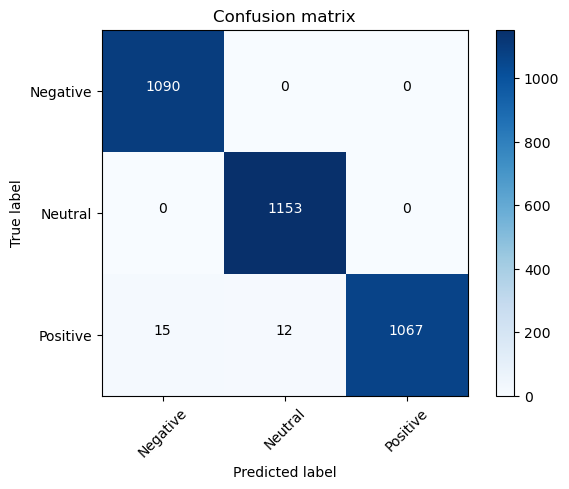

In [95]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

Check out the diagonal elements(1090+1153+1067), they are correctly predicted records and rest are incorrectly classified by the algorithm

In [96]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1090
           1       0.99      1.00      0.99      1153
           2       1.00      0.98      0.99      1094

    accuracy                           0.99      3337
   macro avg       0.99      0.99      0.99      3337
weighted avg       0.99      0.99      0.99      3337



Since predicting both positive,negative and neutral reviews are important we are considering.We got a pretty good f1 score. As we see it got a good score across all classes classified

### Conclusion

We have done a pretty neat job on classifying all the classes starting from splitting the sentiments based on overall score,text cleaning, customize the stopwords list based on requirement and finally handling imbalance with smote. Here are few insights from the notebook.

Consider welcoming ngram in sentiment analysis as one word can't give is proper results and stop words got to be manually checked as they have negative words. It is advised to avoid using stop words in sentiment analysis

Most of our neutral reviews were actual critic of product from the buyers, so amazon can consider these as feedback and give them to the seller to help them improve their products

Most of the reviews in this dataset were about product such as SD Cards.

Balancing the dataset got me a very fruitful accuracy score. Without balancing, I got good precision but very bad recall and inturn affected my f1 score. So balancing the target feature is important

In sentiment analysis, we should concentrate on our f1 score where we got an average of 99% so we did a pretty good job.

### Reference: https://www.kaggle.com/code/benroshan/sentiment-analysis-amazon-reviews/notebook

### Dataset: https://www.kaggle.com/datasets/tarkkaanko/amazon/data